## QUESTION 2 : Logistic Regression

You are given a dataset named football.csv containing information
about football players. Your task is to build a machine learning model to classify whether a player’s contribution type is more inclined towards being type 1 or 0, where 1 indicates players with contributions in the attacking half of the football field and 0 indicates players with contributions in the defending half of the field. The classification column is “contribution type”.

(a) Train a Logistic Regression model using the training data. Implement logistic regression from scratch. You’re NOT ALLOWED to use sklearn for this question.

(b) Make predictions on the test data using the trained model.

(c) Calculate the F1 score, accuracy score, and confusion matrix to evaluate the model’s performance.

In [ ]:
# mounting the drive to get the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# getting the dataset(csv file) and converting into pandas dataframe
path_link = "/content/drive/MyDrive/Colab_Notebooks/IIITB ML/Assignment_1/football.csv"
dataframe = pd.read_csv(path_link)
dataframe.head()

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,158023,L. Messi,93,93,78000000.0,320000.0,34,170,72,73.0,...,20,35,24,6,11,15,14,8,NaN,1
1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,21.0,...,35,42,19,15,6,12,8,10,NaN,1
2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,11.0,...,24,32,24,7,11,15,14,11,NaN,1
3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,73.0,...,35,32,29,9,9,15,15,11,NaN,1
4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,10.0,...,68,65,53,15,13,5,10,13,NaN,1


In [ ]:
#printing the columns to get an idea of the columns of the dataset
dataframe.columns

Index(['sofifa_id', 'short_name', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_jersey_number',
       'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentalit

In [ ]:
#printing the dataframe to find number of columns with NULL values and to check the datatypes of each columns
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    7772 non-null   int64  
 1   short_name                   7772 non-null   object 
 2   overall                      7772 non-null   int64  
 3   potential                    7772 non-null   int64  
 4   value_eur                    7706 non-null   float64
 5   wage_eur                     7711 non-null   float64
 6   age                          7772 non-null   int64  
 7   height_cm                    7772 non-null   int64  
 8   weight_kg                    7772 non-null   int64  
 9   club_team_id                 7711 non-null   float64
 10  club_name                    7711 non-null   object 
 11  league_name                  7711 non-null   object 
 12  league_level                 7711 non-null   float64
 13  club_jersey_number

In [ ]:
# Selecting the required columns from the datasets
dataframe = dataframe.loc[:, ['sofifa_id', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id',
       'league_level', 'club_jersey_number',
       'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type',
       'release_clause_eur', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'contribution_type']]

In [ ]:
# Handling missing data

# Filling NULL values of 'goalkeeping_speed' with 0 value
dataframe['goalkeeping_speed'].fillna(0, inplace=True)

# Performing one-hot-encoding to the columns ['preferred_foot','work_rate', 'body_type'] as datatype of these columns are object type
dataframe = pd.get_dummies(dataframe, columns = ['preferred_foot','work_rate', 'body_type'])

# Filling NULL values of remaining dataset with mean columns of each column
mean = dataframe.mean()
dataframe.fillna(mean, inplace=True)

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    7772 non-null   int64  
 1   overall                      7772 non-null   int64  
 2   potential                    7772 non-null   int64  
 3   value_eur                    7772 non-null   float64
 4   wage_eur                     7772 non-null   float64
 5   age                          7772 non-null   int64  
 6   height_cm                    7772 non-null   int64  
 7   weight_kg                    7772 non-null   int64  
 8   club_team_id                 7772 non-null   float64
 9   league_level                 7772 non-null   float64
 10  club_jersey_number           7772 non-null   float64
 11  nation_jersey_number         7772 non-null   float64
 12  weak_foot                    7772 non-null   int64  
 13  skill_moves       

In [ ]:
dataframe.head()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,body_type_Lean (170-),body_type_Lean (170-185),body_type_Lean (185+),body_type_Normal (170-),body_type_Normal (170-185),body_type_Normal (185+),body_type_Stocky (170-),body_type_Stocky (170-185),body_type_Stocky (185+),body_type_Unique
0,158023,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,188545,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,20801,91,91,45000000.0,270000.0,36,187,83,11.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,190871,91,91,129000000.0,270000.0,29,175,68,73.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,192985,91,91,125500000.0,350000.0,30,181,70,10.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dataframe.sample(frac = 1);

In [ ]:
# selecting features

features=list(dataframe.columns)
features.remove('contribution_type')
print("Our features :"  )
features

Our features :


['sofifa_id',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'league_level',
 'club_jersey_number',
 'nation_jersey_number',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'release_clause_eur',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'de

In [ ]:
# Seperating feature set and target column
# X represents feature set and y represent target attribute
X = dataframe.loc[:,features]
Y = dataframe.loc[:,['contribution_type']]

print(X.shape)
print(Y.shape)

(7772, 78)
(7772, 1)


In [ ]:
# checking the number of unique elements in the target attribute
print('Class labels:', np.unique(Y))

Class labels: [0 1]


### Feature Scaling using z-score Normalisation

In [ ]:
class Standardizer:
    def __init__(self, mean, stdev):
        self.mean = mean
        self.stdev = stdev
    def scale(self, x):
        return (x - self.mean)/self.stdev

In [ ]:
for feature in X.columns:
    X[feature] = X[feature].apply(Standardizer(X[feature].mean(), X[feature].std()).scale)

In [ ]:
print('Class labels:', np.unique(X['age']))
print('Class labels:', np.unique(Y))

Class labels: [-2.26550074 -2.03396057 -1.80242041 -1.57088025 -1.33934008 -1.10779992
 -0.87625976 -0.64471959 -0.41317943 -0.18163927  0.0499009   0.28144106
  0.51298122  0.74452139  0.97606155  1.20760171  1.43914188  1.67068204
  1.90222221  2.13376237  2.36530253  2.5968427   2.82838286  3.05992302
  3.29146319  3.52300335  3.75454351]
Class labels: [0 1]


### Train Test Split

In [ ]:
def train_test(X_dataframe, Y_dataframe, split_value):
    n = int(split_value*len(X_dataframe))

    X_train_data = X_dataframe.iloc[:n, :]
    Y_train_data = Y_dataframe.iloc[:n, :]

    X_test_data =  X_dataframe.iloc[n:, :]
    Y_test_data =  Y_dataframe.iloc[n:, :]

    return X_train_data, Y_train_data, X_test_data, Y_test_data

x_train, y_train, x_test, y_test = train_test(X,Y, 0.8)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6217, 78)
(6217, 1)
(1555, 78)
(1555, 1)


### Initialize weight vector and intercept Term

In [ ]:
def initialize_weights(dim):
  # numpy.zeros_like function return an array of zeros with the same shape and type as a given array
  w = np.zeros_like(dim)
  b = 0
  return w, b

### Compute Sigmoid function and Log Loss

In [ ]:
def sigmoid(z):
    return (1/ (1+np.exp(-z)))

def logloss(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    log_loss = -1 * np.mean( y_true*np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred))
    return log_loss

### Compute gradient w.r.t. to weight(w) and intercept(b)

In [ ]:
def gradient_dw(x, y, w, b, alpha, N):
    dw = x * (y-sigmoid(np.dot(w.T,x)+b)) - ((alpha*w*w)/N)
    return dw

def gradient_db(x, y, w, b):
    db = y-sigmoid(np.dot(w.T,x)+b)
    return db

In [ ]:
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()
x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

In [ ]:
print(x_train_np.shape)
print(y_train_np.shape)
print(x_test_np.shape)
print(y_test_np.shape)
print(type(x_test_np))

(6217, 78)
(6217, 1)
(1555, 78)
(1555, 1)
<class 'numpy.ndarray'>


### Defining Training Function for Logistic Regression

In [ ]:
def train(X_train, y_train, X_test, y_test, epochs, alpha, eta0):
    w, b = initialize_weights(X_train[0])
    N = len(X_train)
    log_loss_train = []
    log_loss_test = []

    for i in range(0, epochs):

        for j in range(N):
            grad_dw = gradient_dw(X_train[j], y_train[j], w, b, alpha, N)
            grad_db = gradient_db(X_train[j], y_train[j], w, b)
            w = np.array(w) + (eta0 * np.array(grad_dw))
            b = b + (eta0 * grad_db)

        # predict the output of x_train[for all data points in X_train] using w and b
        predict_train = []
        for m in range(len(y_train)):
            z = np.dot(w, X_train[m])+b
            predict_train.append(sigmoid(z))

        # store all the train loss values in a list
        train_loss = logloss(y_train, predict_train)

        # predict the output of x_test[for all data points in X_test] using w,b
        predict_test = []
        for m in range(len(y_test)):
            z = np.dot(w, X_test[m])+b
            predict_test.append(sigmoid(z))

        # store all the test loss values in a list
        test_loss = logloss(y_test, predict_test)

        # we can also compare previous loss and current loss,
        #if loss is not updating then stop the process and return w,b
        if log_loss_train and train_loss > log_loss_train[-1]:
            return w, b, log_loss_train, log_loss_test

        # print("Log Train Loss :",train_loss,"  Log Test Loss : ",test_loss)
        log_loss_train.append(train_loss)
        log_loss_test.append(test_loss)

    return w, b, log_loss_train, log_loss_test, predict_test


### Train the custom Model

In [ ]:
alpha  = 0.0001
eta0   = 0.0001
epochs = 50
w, b, log_loss_train, log_loss_test, predict_test = train(x_train_np, y_train_np, x_test_np, y_test_np, epochs, alpha, eta0)

Plotting Log loss vs epochs graph for training data and test data

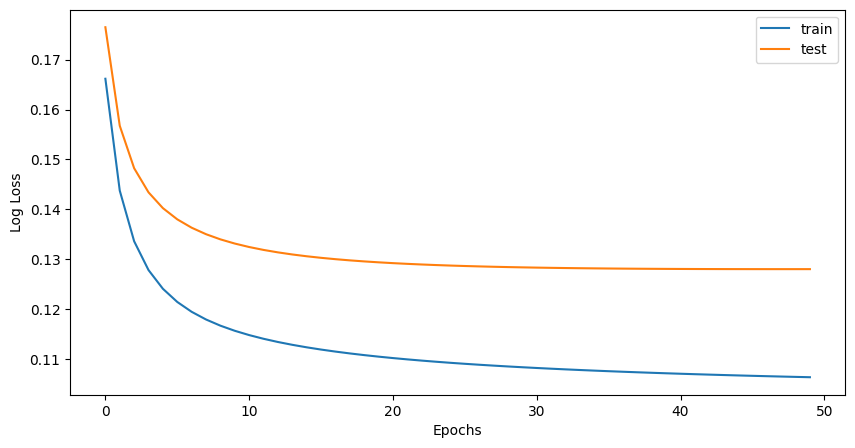

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(log_loss_train)
plt.plot(log_loss_test)
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend(['train', 'test'])
# plt.xticks(rotation = 35)
plt.show();

In [ ]:
print(len(predict_test))

1555


In [ ]:
print("Weights : ", w)
print("Intercept : ", b)

Weights :  [ 0.17493192 -0.20489119 -0.11688429 -0.01152121 -0.04502935 -0.20000801
 -0.06518421 -0.0041742   0.01990516 -0.07279293  0.00446056 -0.06480609
 -0.06081066  0.14580265  0.01774778  0.01952481 -0.14906101  0.2982371
 -0.0246278   0.10221483 -0.59800701 -0.07128024 -0.23013808  0.4501117
 -0.02042849  0.17908017  0.21258723  0.1634964  -0.04721844  0.00625937
  0.11137009  0.20870171 -0.01344558 -0.05058257  0.07886787  0.04184013
  0.15749553  0.05240316 -0.10386846  0.19686609 -0.05581189  0.20376036
 -0.00547918 -0.35892145  0.31095737  0.32237441  0.19528153  0.04971826
 -0.41623076 -0.36177166 -0.49841913 -0.13397112 -0.14823167 -0.14886509
 -0.14342371 -0.17065044 -0.15108885 -0.10356685  0.10356684 -0.00327649
  0.03438454 -0.17063855  0.08108543  0.0400473  -0.07152119  0.11822647
  0.03908143  0.02700332 -0.04771621 -0.02595038 -0.05435321  0.01793731
  0.00139996  0.00782596 -0.00927371  0.12487456  0.02909515 -0.00771491]
Intercept :  [-0.24248551]


### Making Prediction on the trained data

In [ ]:
z = np.dot(w,x_test_np[0])+b
print(z)
print(sigmoid(z))

[-3.70996353]
[0.02389354]


Defining function to classify datapoints into classes

In [ ]:
def predict(X_test, y_test):
    predict_test = []
    for m in range(len(y_test)):
        z = np.dot(w, X_test[m])+b
        val = sigmoid(z)
        if val>0.5:
            predict_test.append(1)
        else:
            predict_test.append(0)
    return predict_test

y_test_pred =  predict(x_test_np, y_test_pred)
# print(y_test_pred)

Defining Accuracy score and F1_score function

In [ ]:
def accuracy_score(TP,TN,FP,FN):
    acc = (TN+TP)/(TP+TN+FP+FN)
    return acc

def f1_score(TP,TN,FP,FN):
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1 = (2*precision*recall)/(precision+recall)
    return f1

Defining function to calculate Confusion matrix elements

In [ ]:
def calculate_confusion_matrix(y_test_pred,y_test_np):
    TN = 0
    TP = 0
    FN = 0
    FP = 0
    for i in range(0,len(y_test_pred)):
        if(y_test_pred[i]==0 and y_test_np[i][0]==0):
            TN+=1
        elif(y_test_pred[i]==1 and y_test_np[i][0]==1):
            TP+=1
        elif(y_test_pred[i]== 1 and y_test_np[i][0]==0):
            FP+=1
        elif(y_test_pred[i]== 0 and y_test_np[i][0]==1):
            FN+=1
    return TP,TN,FP,FN

TP,TN,FP,FN = calculate_confusion_matrix(y_test_pred,y_test_np)
print(TP,TN,FP,FN)
print(TP+TN+FP+FN)

577 772 105 101
1555


In [ ]:
# Calculating f1 score and accuracy using defined function
print("F1 Score : ",f1_score(TP,TN,FP,FN))
print("Accuracy score : ",accuracy_score(TP,TN,FP,FN))

F1 Score :  0.8485294117647059
Accuracy score :  0.867524115755627


In [ ]:
# Define confusion
confusion_matrix = [[TP,FP],[FN,TN]]

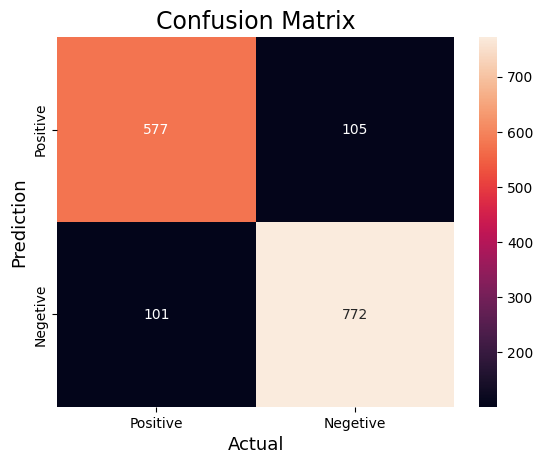

In [ ]:
import seaborn as sns

#Plot the confusion matrix using Heap Map
sns.heatmap(confusion_matrix,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negetive'],
            yticklabels=['Positive','Negetive'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()